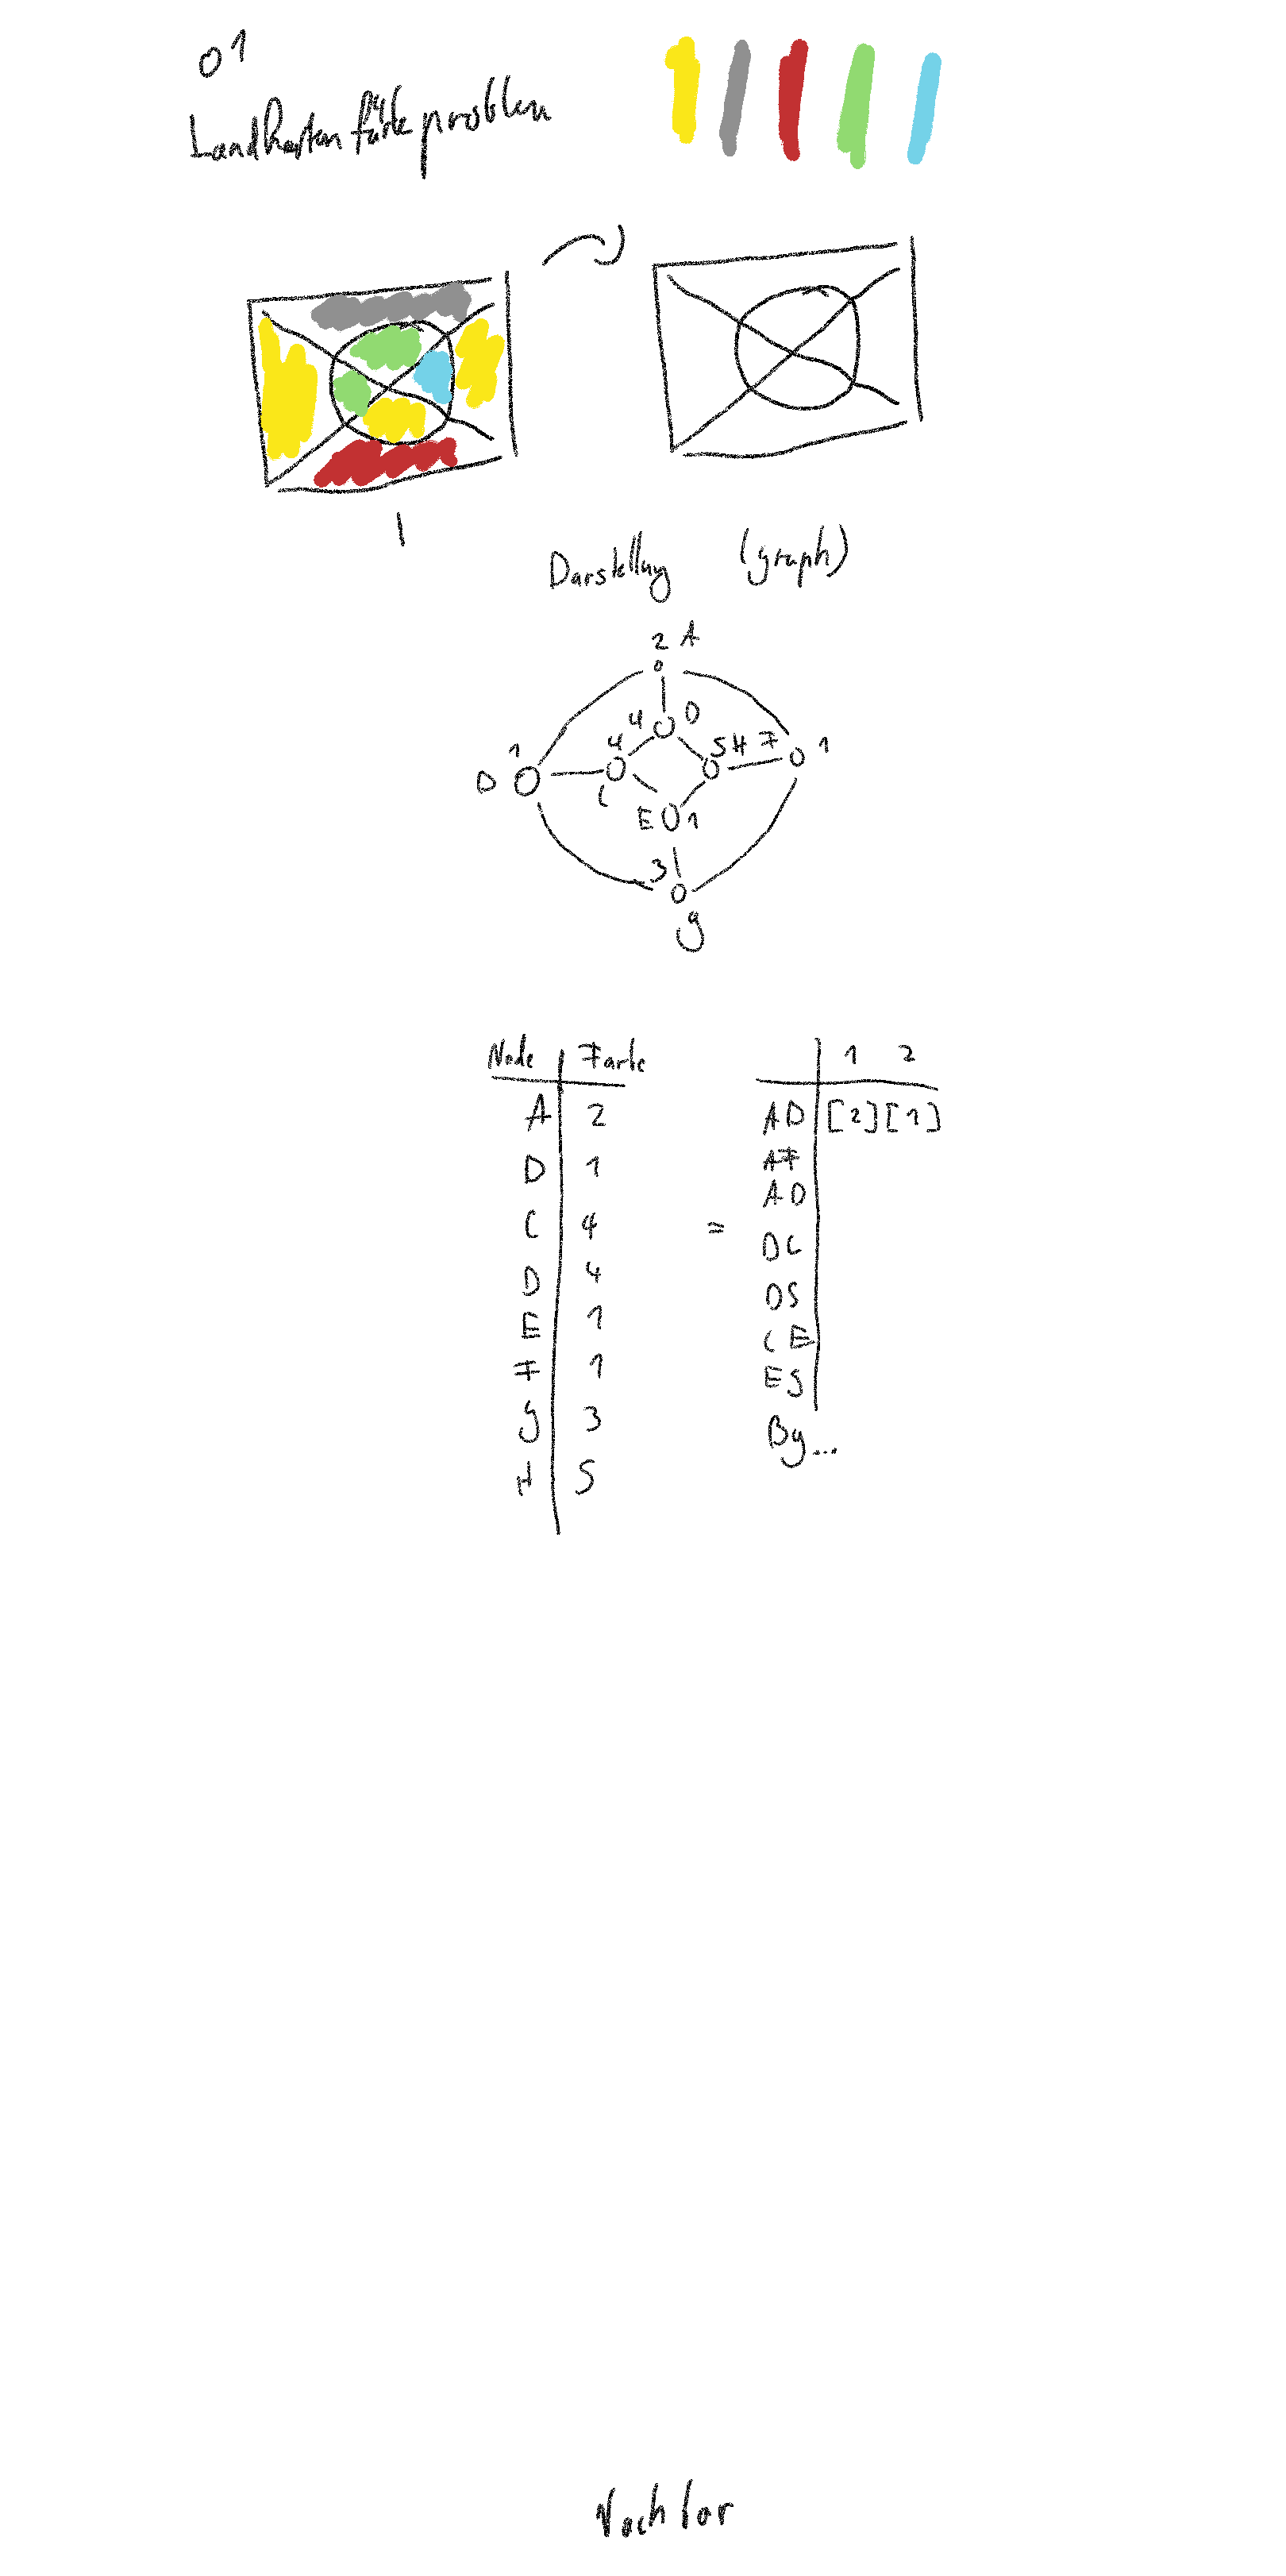

In [27]:
#KartenFärb Problem

#Graph

import random as rnd


#A B C
#Connections:
#AB AC BC

nodes = ["A","B","C","D","E","F","G","H"]
Connections= ["AB","AE","AD","BF","BC","CG","CD","DH","EF","HF","FG","GH"]

def getRandomColor():
    return rnd.randrange(1,4)#1-5

def getRandomZustand():
    return [getRandomColor() for _ in range(len(nodes))]# länge von nodes

def zielfunktion(l):
    conflicts = 0
    for conn in Connections:          # jede Kante prüfen
        n1 = conn[0]                  # erster Knoten, z. B. "A"
        n2 = conn[1]                  # zweiter Knoten, z. B. "B"
        i1 = nodes.index(n1)          # Index von A
        i2 = nodes.index(n2)          # Index von B
        if l[i1] == l[i2]:            # gleiche Farbe?
            conflicts += 1
    return conflicts

def killBad():
    if len(genpool) >= 20:
        while len(genpool) > 20:
            genpool.remove(findworst(genpool))

genpool = [getRandomZustand(),getRandomZustand()]

def selection(genpool):
    # Zwei zufällige Eltern wählen
    p1 = rnd.choice(genpool)
    p2 = rnd.choice(genpool)
    # Neues Kind erzeugen
    child = crossover(p1, p2)
    # Mutieren
    mutation(child)
    # Kind zur Population hinzufügen
    genpool.append(child)

def crossover(l, m):
    schnittpunkt = rnd.randrange(1, len(l))# Zufälliger Punkt (nicht 0, nicht Ende)
    # Neues Kind = linker Teil von l + rechter Teil von m
    kind = l[:schnittpunkt] + m[schnittpunkt:]
    return kind

def mutation(l):
    l[rnd.randrange(0, len(l))] = getRandomColor()

def findbest(genpool):
    highest = 50
    node = 0
    for g in genpool:
        if zielfunktion(g) < highest:
            highest = zielfunktion(g)
            node = g
    print(f"{node}: {zielfunktion(node)}")

def findworst(genpool):
    highest = 0
    node = 0
    for g in genpool:
        if zielfunktion(g) > highest:
            highest = zielfunktion(g)
            node = g
    return node

def completerun():
    selection(genpool)
    #printgenpool(genpool,evolution)
    killBad()

#---- start --------
print(genpool)
evolution = 0
for i in range(100):

    evolution += 1
    completerun()
findbest(genpool)

[[1, 3, 1, 1, 3, 1, 3, 1], [3, 1, 1, 3, 2, 2, 3, 3]]
[1, 3, 2, 3, 3, 1, 3, 2]: 0
